In [ ]:
!pip install --upgrade pip
!pip install --upgrade tflite-support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1: Load dataset
file_path = "job_data.xlsx"
df = pd.read_excel(file_path)

In [ ]:
# Step 2: Data cleaning
df['Experience'] = df['Experience'].replace({pd.Timestamp('2024-03-05'): '3-5'})

df['Age'] = df['Age'].astype(str)
df['Experience'] = df['Experience'].astype(str)
df['City'] = df['City'].astype(str)

In [ ]:
# Step 3: One-hot encode features
disability_encoder = OneHotEncoder(sparse_output=False)
age_encoder = OneHotEncoder(sparse_output=False)
experience_encoder = OneHotEncoder(sparse_output=False)
city_encoder = OneHotEncoder(sparse_output=False)

encoded_disability = disability_encoder.fit_transform(df[['Disability']])
encoded_age = age_encoder.fit_transform(df[['Age']])
encoded_experience = experience_encoder.fit_transform(df[['Experience']])
encoded_city = city_encoder.fit_transform(df[['City']])

# Combine all features
X = np.hstack((encoded_disability, encoded_age, encoded_experience, encoded_city))

# One-hot encode target (Job)
job_encoder = OneHotEncoder(sparse_output=False)
y = job_encoder.fit_transform(df[['Job']])

# Step 4: Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train model
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=4,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Step 7: Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0146 - loss: 4.6453 - val_accuracy: 0.0000e+00 - val_loss: 4.6640
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0236 - loss: 4.5853 - val_accuracy: 0.0159 - val_loss: 4.7173
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0713 - loss: 4.2560 - val_accuracy: 0.0476 - val_loss: 4.5949
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1264 - loss: 3.7320 - val_accuracy: 0.0794 - val_loss: 4.3980
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2999 - loss: 3.0253 - val_accuracy: 0.1111 - val_loss: 3.9970
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3657 - loss: 2.4807 - val_accuracy: 0.1587 - val_loss: 3.6463
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4460 - loss: 1.9206 - val_accuracy: 0.3016 - val_loss: 3.0055
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5556 - loss: 1.5579 - val_accuracy: 0.365

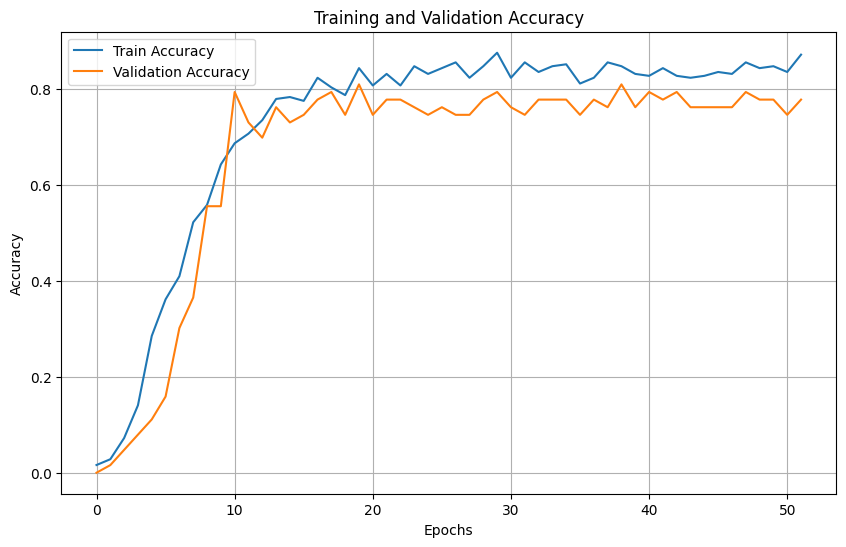

In [ ]:
import matplotlib.pyplot as plt

# Step 8: Plot training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Step 9: Predict user input
# For example:
user_data = pd.DataFrame({
    'Disability': ['Daksa'],
    'Age': ['17-24'],
    'Experience': ['0-2'],
    'City': ['Tangerang']
})

# Encode user input
user_disability_encoded = disability_encoder.transform(user_data[['Disability']])
user_age_encoded = age_encoder.transform(user_data[['Age']])
user_experience_encoded = experience_encoder.transform(user_data[['Experience']])
user_city_encoded = city_encoder.transform(user_data[['City']])

# Combine all features
user_input = np.hstack((user_disability_encoded, user_age_encoded, user_experience_encoded, user_city_encoded))

# Job prediction:
predicted_job = model.predict(user_input)
job_index = np.argmax(predicted_job)
recommended_job = job_encoder.categories_[0][job_index]

print("Rekomendasi Pekerjaan:", recommended_job)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Rekomendasi Pekerjaan: Waitress


In [ ]:
# Step 10:  Convert
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Step 11: Save .tflite file
with open('job_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi menjadi .tflite dan disimpan sebagai 'job_recommendation_model.tflite'")

Saved artifact at '/tmp/tmpsd_qxraz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 23), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 104), dtype=tf.float32, name=None)
Captures:
  138293245930912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293289572960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293235710992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293235709056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293235710464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293235703248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293235305632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293235308800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293235316544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138293235306160: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil dikonver